In [1]:
123

123

In [2]:
import data_handler
import model as M
import dilated_model as DM
import trainer as T

import numpy as np
import torch as th
from torch.autograd import Variable
import pickle
import random
random.seed(42)

In [3]:
from IPython import display
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
# import seaborn as sns
import time

%matplotlib inline
th.multiprocessing.set_sharing_strategy('file_system')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
dataset = data_handler.DataSet(
    'data/marci_features/REFERENCE.csv', data_handler.load_crop_thresholded,
    random_invert=True,
    crop_len=2100,
    sigma=2.2,
    path='data/marci_features/',
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.8)
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=1, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

In [5]:
resnet9_32 = DM.ResNet(9, 32)

generating block: 1
generating block: 2
generating block: 3
generating block: 4
generating block: 5
generating block: 6
generating block: 7
generating block: 8


In [6]:
def plot_logit(dilNet):
    dil_res = dilNet.forward_features(t_data, )
    plt.imshow(dil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
    plt.show()

    plt.subplot(3,1,1)
    plt.plot(dil_res.data.numpy().squeeze()[0])

    plt.subplot(3,1,2)
    plt.plot(dil_res.data.numpy().squeeze()[1])

    plt.subplot(3,1,3)
    plt.plot(dil_res.data.numpy().squeeze()[2])

# PROOF OF CONCEPT

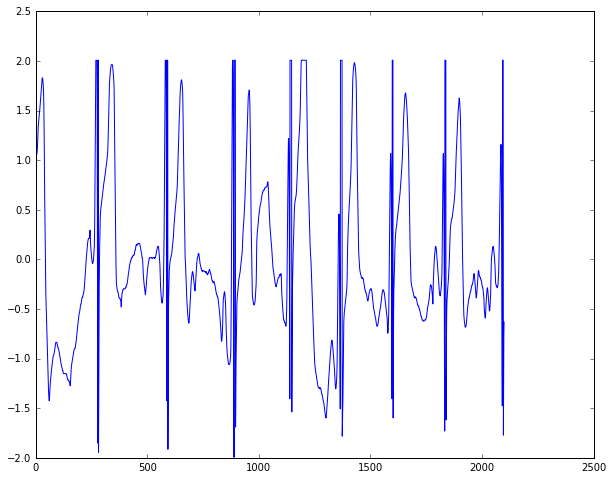

In [7]:
it = iter(train_producer)
data = it.next()
in_channels = data['x'].size()[1]
t_data = data['x']
plt.plot(t_data.data.numpy().squeeze())

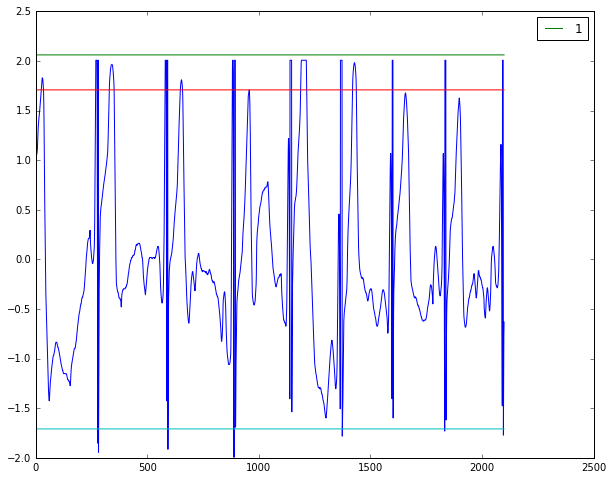

In [8]:
_data = t_data.data.clone().numpy().squeeze()
sigma = 3
_data[np.abs(_data) > _data.std()*sigma] = _data.std()*sigma

plt.plot(_data.squeeze())
plt.plot(np.ones(2100)*(_data**2).std()**.5*2, label='1')
plt.plot(np.ones(2100)*_data.std()*2)
plt.plot(np.ones(2100)*_data.std()*-2)
plt.legend()
#plt.plot()

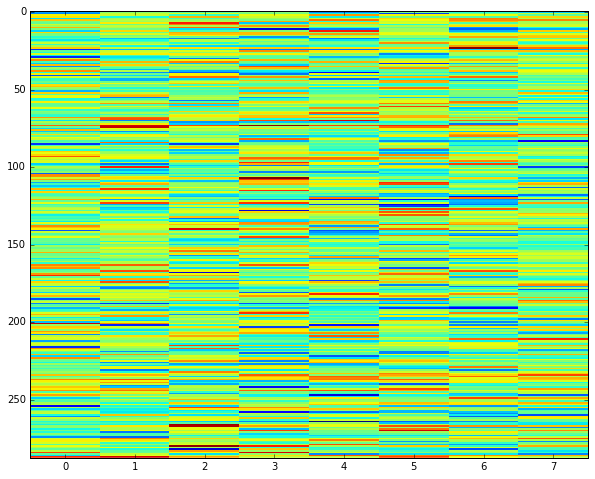

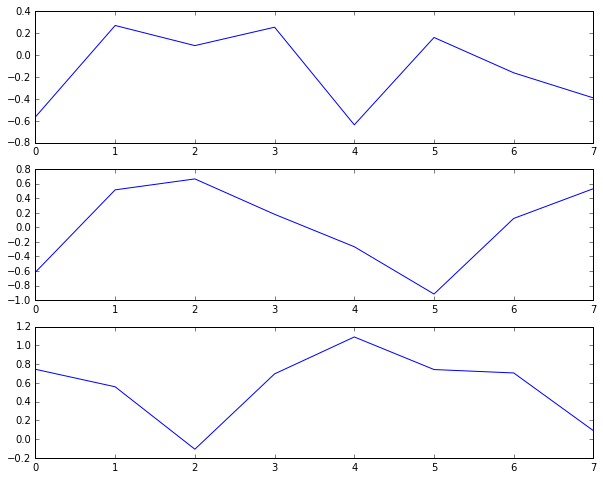

In [9]:
plot_logit(resnet9_32)

In [10]:
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=32, shuffle=True,
        num_workers=4, collate_fn=data_handler.batchify)
test_producer = th.utils.data.DataLoader(
        dataset=eval_set, batch_size=16, shuffle=True,
        num_workers=4, collate_fn=data_handler.batchify)
trainer = T.trainer('ckpt/resnet9_32')
trainer(resnet9_32, train_producer, test_producer, epochs=1000, gpu_id=0)

[1,  21] sample/sec 19.69
[1,  42] sample/sec 19.65
[1,  63] sample/sec 19.71
[1,  84] sample/sec 19.71
[1, 105] sample/sec 19.89
[1, 126] sample/sec 19.81
[1, 147] sample/sec 19.72
[1, 168] sample/sec 19.65
[1, 189] sample/sec 19.62
[1, 210] sample/sec 19.84
Train acc: 
 0.3909  0.3833  0.3267
[torch.FloatTensor of size 1x3]

Test acc:
 107, sample/sec: 16.29
 0.5459  0.4159  0.4125
[torch.FloatTensor of size 1x3]

epoch time:       6.25 min
     total:       6.25 min
 est. left:    6246.08 min
----------------------------------------
[2,  21] sample/sec 19.41
[2,  42] sample/sec 19.40
[2,  63] sample/sec 19.26
[2,  84] sample/sec 19.46
[2, 105] sample/sec 19.70
[2, 126] sample/sec 19.72
[2, 147] sample/sec 19.87
[2, 168] sample/sec 19.68
[2, 189] sample/sec 20.02
[2, 210] sample/sec 19.67
Train acc: 
 0.5235  0.4299  0.4158
[torch.FloatTensor of size 1x3]

Test acc:
 107, sample/sec: 17.38
 0.5092  0.5203  0.3345
[torch.FloatTensor of size 1x3]

epoch time:       6.24 min
     total:

[16,  42] sample/sec 20.49
[16,  63] sample/sec 20.82
[16,  84] sample/sec 20.65
[16, 105] sample/sec 20.66
[16, 126] sample/sec 20.96
[16, 147] sample/sec 20.89
[16, 168] sample/sec 20.95
[16, 189] sample/sec 20.82
[16, 210] sample/sec 20.95
Train acc: 
 0.5851  0.5562  0.4445
[torch.FloatTensor of size 1x3]

Test acc:
 107, sample/sec: 17.67
 0.5498  0.5228  0.4474
[torch.FloatTensor of size 1x3]

epoch time:       6.15 min
     total:      98.48 min
 est. left:    6056.33 min
----------------------------------------
[17,  21] sample/sec 20.80
[17,  42] sample/sec 20.94
[17,  63] sample/sec 20.87
[17,  84] sample/sec 20.87
[17, 105] sample/sec 20.75
[17, 126] sample/sec 20.86
[17, 147] sample/sec 21.01
[17, 168] sample/sec 20.87
[17, 189] sample/sec 20.85
[17, 210] sample/sec 21.00
Train acc: 
 0.5848  0.5397  0.4500
[torch.FloatTensor of size 1x3]

Test acc:
 107, sample/sec: 17.73
 0.5982  0.5680  0.3177
[torch.FloatTensor of size 1x3]

epoch time:       6.14 min
     total:     10

Process Process-140:
Process Process-139:
Process Process-138:
Process Process-137:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.5

KeyboardInterrupt: 

In [ ]:
f1 = Variable(th.ones(3, 128)).cuda()
f2 = Variable(th.ones(3, 222)).cuda()

th.cat([f1, f2], dim=1)

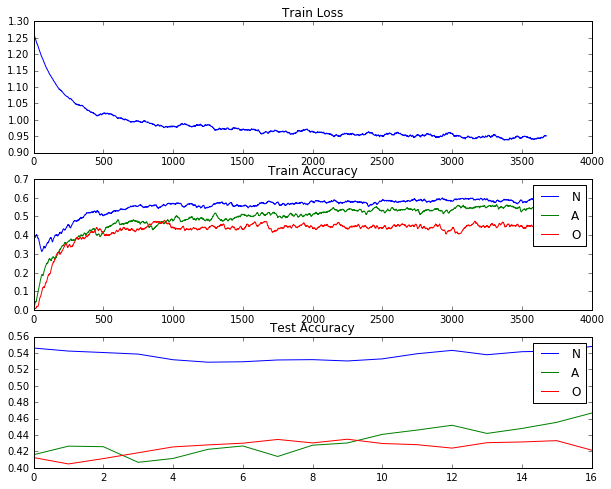

In [11]:
_ = trainer.plot(.01, .01, .1)

In [25]:
from scipy.io import loadmat

In [51]:
for f in loadmat('./data/marci_features/A00001.mat')['features'][0, -5:]:
    print (f.shape)
    
features = np.concatenate(loadmat('./data/marci_features/A00001.mat')['features'][0, -5:], axis=1)

(1, 55)
(1, 33)
(1, 22)
(1, 22)
(1, 90)


In [ ]:
resnet8_32.forward_conv(t_data).shape

In [62]:
thf = th.from_numpy(features)

th.cat([thf, thf], dim=1).size()

torch.Size([1, 444])

In [57]:
np.append(features, features, axis=1).shape

(1, 444)

In [24]:
[p.clone() for p in resnet8_32.parameters()]
#Variable.clone()

[Variable containing:
 (0 ,.,.) = 
   1.1704e-02 -4.1654e-02 -1.3536e-02  ...  -2.2484e-02 -2.7553e-02 -2.9429e-02
 
 (1 ,.,.) = 
   3.1314e-01  1.0371e-01  7.3563e-02  ...   2.2127e-02  1.3611e-01  1.2428e-01
 
 (2 ,.,.) = 
  -5.7946e-41  3.8220e-41 -5.3961e-41  ...   7.6640e-41  1.2770e-41  3.3771e-42
 ...
 
 (29,.,.) = 
  -2.3313e-02 -8.2931e-03  4.5887e-03  ...   2.4769e-03  4.1026e-02  3.0165e-02
 
 (30,.,.) = 
   1.0672e-02  7.5645e-02  2.1518e-02  ...   2.5191e-02  1.8335e-03  3.7230e-02
 
 (31,.,.) = 
  -5.8968e-02 -6.1178e-02  3.0667e-02  ...   5.8379e-02 -1.1740e-01  8.1035e-02
 [torch.cuda.FloatTensor of size 32x1x32 (GPU 0)], Variable containing:
  4.4081e-01
  2.8503e-01
  5.9946e-09
  1.9577e-01
  4.1578e-01
  2.4918e-01
  1.1495e+00
  6.2733e-01
  7.5124e-01
  4.5208e-01
  4.7406e-01
  3.4857e-01
  8.9330e-01
  4.1835e-01
  2.2552e-01
  2.4274e-01
 -1.5933e-01
  2.2952e-01
  6.5042e-01
  1.6151e-01
  6.1912e-02
 -1.4725e-02
  2.2626e-01
 -5.7591e-03
  7.5663e-02
  1.3878

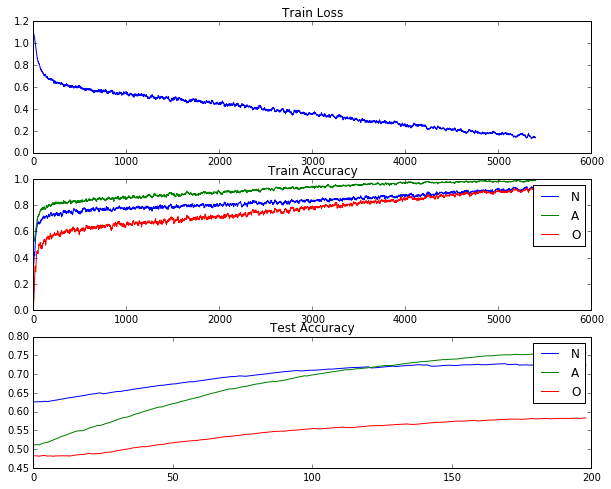

In [16]:
T = th.load('ckpt/dilfcn2x128-2x256-2x512-124466trainer')
_ = T.plot(.1, .1, .01)